# Comparing means using Python

In this notebook we compare sample means about weight loss from the TV show The Biggest Loser. 

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

We are bringing the data into python so we can do our analysis. This works best with .csv files but you can also use excel files that end with .xlsx using the code `df = pd.read_excel("<Name of file>.xlsx")`.

By convention we use `df` to be the name of our dataframe.

After bringing the data into Python, we use the method `.head()` to see the top 5 values. We could also use `.tail()` to see the bottom 5 values. 

In [3]:
df = pd.read_csv("data/The Biggest Loser Dataset.csv")

df.head()

,Gender,Age_Group,Age,Weight1,Weight2,Height,Season,Trainer,Percent2,Percent1
0,Female,< 30,21,175,170,66,1,Bob,12.57,2.857143
1,Female,< 30,22,215,209,69,1,Bob,27.44,2.790698
2,Male,< 30,25,310,288,74,1,Jillian,19.68,7.096774
3,Female,< 30,26,236,226,66,1,Jillian,24.15,4.237288
4,Female,< 30,26,167,164,65,1,Jillian,13.17,1.796407


Pandas gives us a number of methods to explore the data. Try using some like `df.describe()`, `df.info()`, and `df.shape()`. 

You can look at attributes of a single column by selecting it using brackets. For example, `df["Weight1"].describe()` or `df["Age"].shape()`.

<AxesSubplot:>

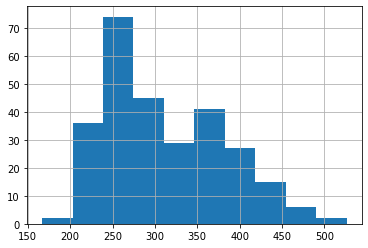

In [4]:
df["Weight1"].hist()

In [5]:
df.groupby(["Gender"])["Weight1"].mean()

Gender
Female    260.537931
Male      367.037879
Name: Weight1, dtype: float64

In [6]:
df.groupby(["Trainer"])["Weight1"].mean()

Trainer
Anna            273.600000
Bob             308.645570
Brett & Cara    340.666667
Dolvett         305.222222
Jennifer        311.857143
Jessie          301.166667
Jillian         314.327586
Kim             315.583333
Name: Weight1, dtype: float64

#  Feature Engineering
Let's create a new column that shows how much weight each person lost during the show. To do that, we subtract the final weight from the start weight and save the result as a new column called "weight difference."

In [7]:
df["weight difference"] = df["Weight1"] - df["Weight2"]

<AxesSubplot:>

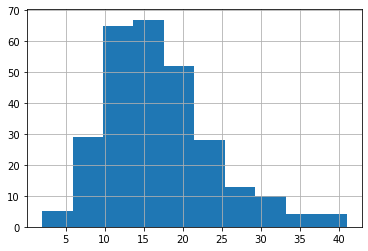

In [8]:
df["weight difference"].hist()

In [9]:
df.groupby(["Trainer", "Gender"])["weight difference"].mean()

Trainer       Gender
Anna          Female     6.666667
              Male      14.500000
Bob           Female    13.317073
              Male      20.789474
Brett & Cara  Female    15.000000
              Male      23.800000
Dolvett       Female    12.190476
              Male      22.133333
Jennifer      Female    14.333333
              Male      19.000000
Jessie        Female    10.400000
              Male       7.000000
Jillian       Female    13.542373
              Male      21.859649
Kim           Female     9.333333
              Male      18.666667
Name: weight difference, dtype: float64

# T-tests with SciPy

We import the module SciPy because it has most of the common parametric statistics tests. 

In [10]:
from scipy import stats

Is the amount of weight lost different between men and women on the show? We begin by subsetting the data into two lists based on gender. We then compare the weight loss using scipy's statistics method for an indpendent t-test. 

In [11]:
X = df[df["Gender"]=="Female"]["weight difference"]
Y = df[df["Gender"]=="Male"]["weight difference"]

stats.ttest_ind(X,Y)

Ttest_indResult(statistic=-11.866817037264308, pvalue=1.669364362218035e-26)

We see that there is evidence that the average weight loss during the show is different between men and women. The p-value is very low so we would not expect to see this difference in weight loss due to random chance. 

<AxesSubplot:xlabel='weight difference', ylabel='Count'>

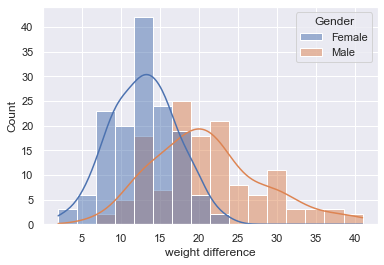

In [25]:
sns.histplot(df, x="weight difference", hue="Gender", kde=True)

## Is Jillian Michaels the best coach?

Jillian Michaels became the best known coach from her time on the series. But did she have the best results? We can do a simple t-test to see if the weight loss was different depending on if the participant had Jillian or another trainer. The `!=` means `not equal to`.

In [13]:
X = df[df["Trainer"]=="Jillian"]["weight difference"]
Y = df[df["Trainer"]!="Jillian"]["weight difference"]

stats.ttest_ind(X,Y)

Ttest_indResult(statistic=1.6089930638638117, pvalue=0.10876520389650461)

Based on this simple test we would conclude that there is not evidence to support the claim that the weight loss is different depending on if the participant had Jillian or another trainer. 

To make it easier to plot, we create a new column with a list comprehension that is 1 if the person had Jillian and zero otherwise. 

<AxesSubplot:xlabel='weight difference', ylabel='Count'>

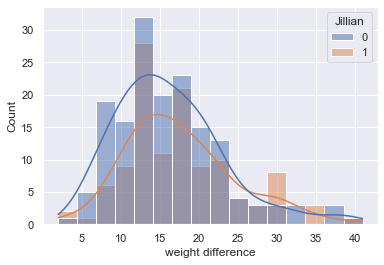

In [27]:
df["Jillian"] = [1 if i =="Jillian" else 0 for i in df["Trainer"]]
sns.histplot(df, x="weight difference", hue="Jillian", kde=True)